In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import joblib
import seaborn as sns

# DATA CLEANING

In [2]:
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('/Users/sarthaksharna/Prospenity_Modelling/Data/raw/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
num_cols = df.select_dtypes(exclude = 'object').columns.tolist()
num_cols = [num_cols for num_cols in num_cols if num_cols != 'CustomerID']

print(f"Numeric columns are {len(num_cols)} : \n")
num_cols

Numeric columns are 13 : 



['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [6]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()


print(f"Categorical columns are {len(cat_cols)} : \n")

cat_cols

Categorical columns are 6 : 



['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [7]:
print("Missing Values for each feature : \n")
df.isnull().sum().sort_values(ascending = False)    

Missing Values for each feature : 



DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [10]:
print("Categorical Columns Value Counts \n")
for col in cat_cols :
    print(df[col].value_counts())
    print("\n")

Categorical Columns Value Counts 

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64


ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64


MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64




In [11]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [12]:
df['ProdTaken'].value_counts(normalize = True)*100

ProdTaken
0    81.178396
1    18.821604
Name: proportion, dtype: float64

<!-- --- -->

<!-- --- -->

<!-- ---- -->

## FEATURE ENGINEERING

In [13]:
df['Gender'] = df['Gender'].replace('Fe Male' , 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single' , 'Unmarried')

In [14]:
threshold = 10
occ_value_counts = df['Occupation'].value_counts()
rare_categories = occ_value_counts[occ_value_counts < threshold].index

df['Occupation'] = df['Occupation'].replace(rare_categories, 'Other')

print(df['Occupation'].value_counts())

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Other                2
Name: count, dtype: int64


In [15]:
median_cols = ['Age' , 'DurationOfPitch' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfTrips' , 'NumberOfChildrenVisiting' ,  'MonthlyIncome']

mode_col = ['TypeofContact']

for col in median_cols :
    df[col] = df[col].fillna(df[col].median())

for col in mode_col :
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
int_cols = ['Age' , 'DurationOfPitch' , 'NumberOfFollowups' , 'PreferredPropertyStar' , 'NumberOfTrips' , 'MonthlyIncome']

for col in int_cols :
    df[col] = df[col].astype(int)

In [17]:
df['TotalPersonVisting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

df['isChildrenVisiting'] = df['NumberOfChildrenVisiting'].apply(lambda x : 1 if x > 0 else 0)

df.drop(columns = ['NumberOfPersonVisiting' , 'NumberOfChildrenVisiting' , 'CustomerID'] , axis = 1 , inplace = True)

In [18]:
df['TotalPersonVisting'] = df['TotalPersonVisting'].astype(int)

In [19]:
num_cols = df.select_dtypes(include = 'int').columns.tolist()

cat_cols = df.select_dtypes(include = 'object').columns.tolist()

In [20]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisting,isChildrenVisiting
0,1,41,Self Enquiry,3,6,Salaried,Female,3,Deluxe,3,Unmarried,1,1,2,1,Manager,20993,3,0
1,0,49,Company Invited,1,14,Salaried,Male,4,Deluxe,4,Divorced,2,0,3,1,Manager,20130,5,1
2,1,37,Self Enquiry,1,8,Other,Male,4,Basic,3,Unmarried,7,1,3,0,Executive,17090,3,0
3,0,33,Company Invited,1,9,Salaried,Female,3,Basic,3,Divorced,2,1,5,1,Executive,17909,3,1
4,0,36,Self Enquiry,1,8,Small Business,Male,3,Basic,4,Divorced,1,0,5,1,Executive,18468,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,Self Enquiry,3,9,Small Business,Male,5,Deluxe,4,Unmarried,2,1,1,1,Manager,26576,4,1
4884,1,28,Company Invited,1,31,Salaried,Male,5,Basic,3,Unmarried,3,1,3,1,Executive,21212,6,1
4885,1,52,Self Enquiry,3,17,Salaried,Female,4,Standard,4,Married,7,0,1,1,Senior Manager,31820,7,1
4886,1,19,Self Enquiry,3,16,Small Business,Male,4,Basic,3,Unmarried,3,0,5,0,Executive,20289,5,1


<!-- ---- -->

<!-- ---- -->

<!-- --- -->

## UNIVARIATE ANALYSIS

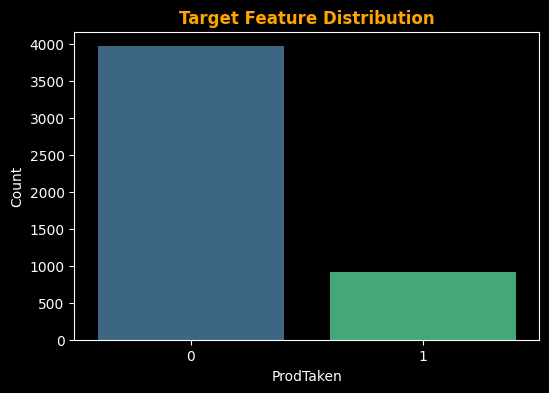

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'ProdTaken' , data = df , palette = 'viridis')
plt.title("Target Feature Distribution", fontsize = 12 , color = 'orange' , fontweight = 'bold')
plt.xlabel("ProdTaken")
plt.ylabel("Count")
plt.show()

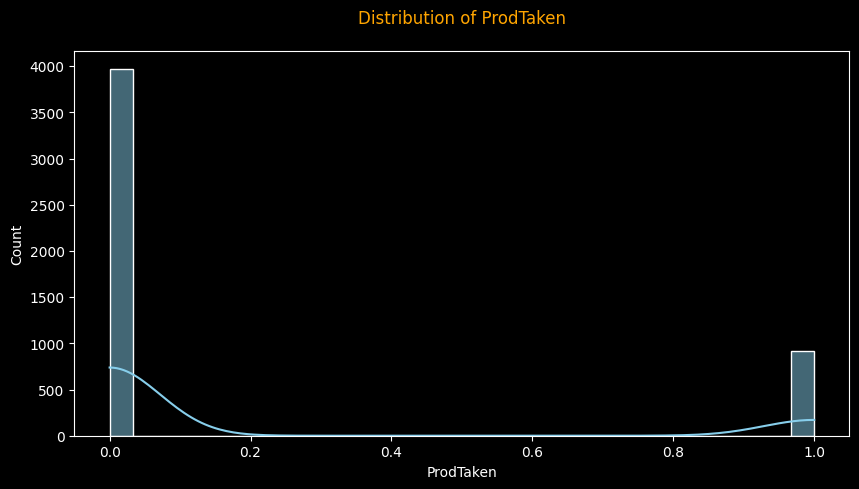

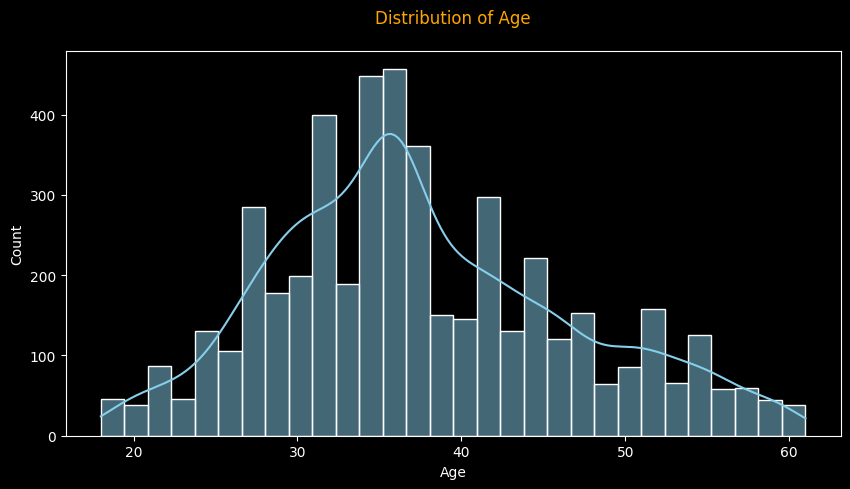

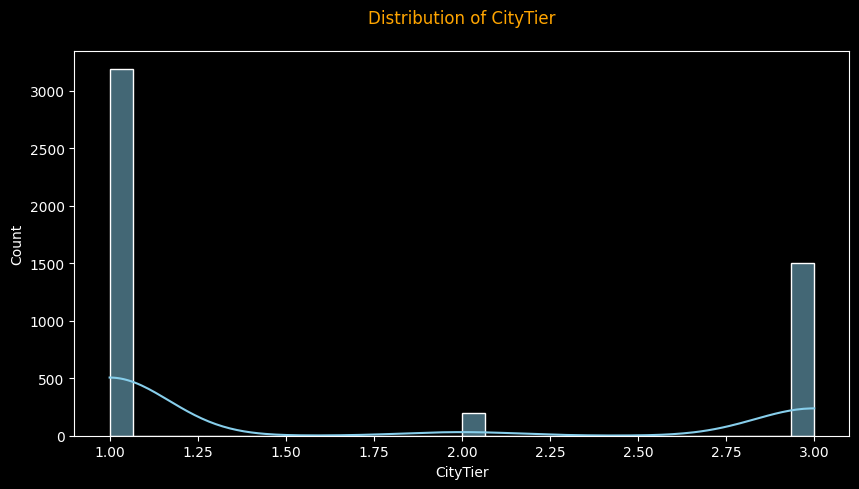

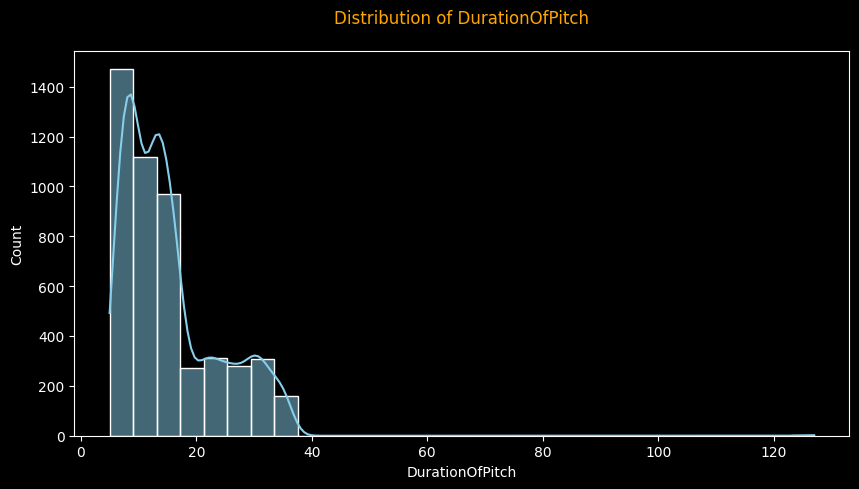

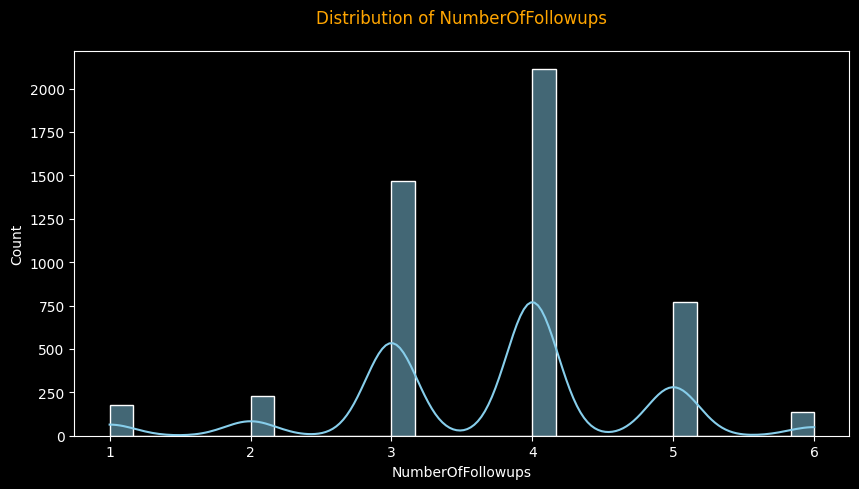

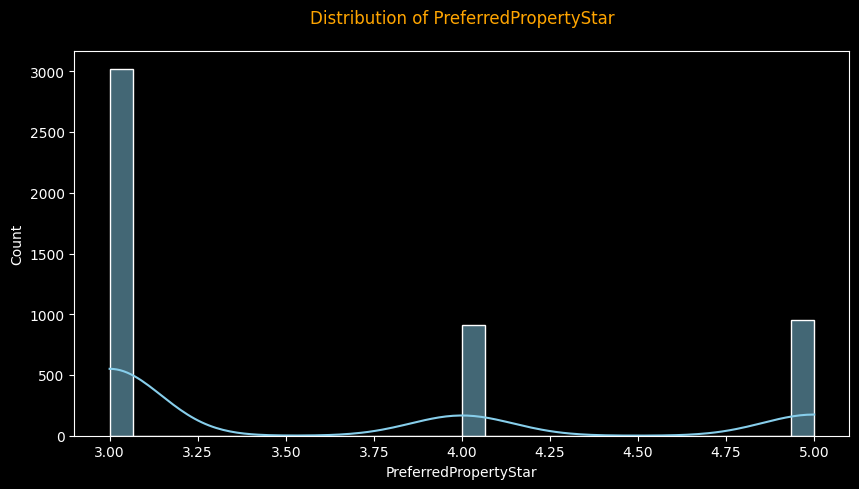

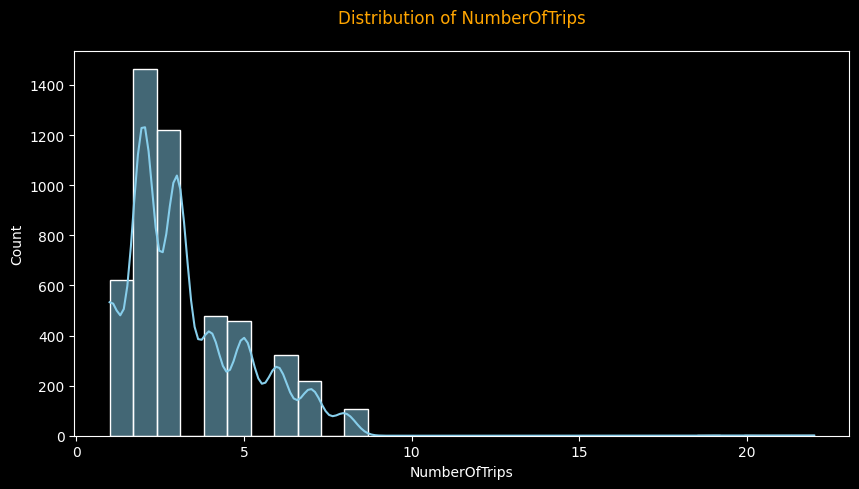

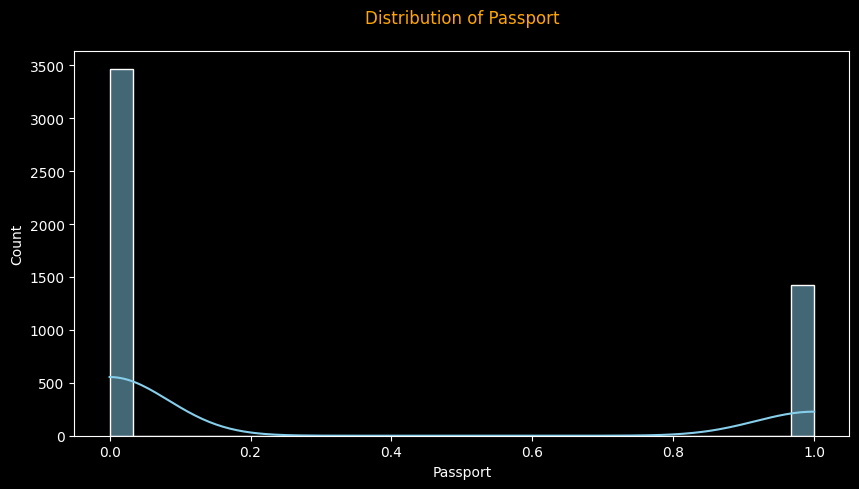

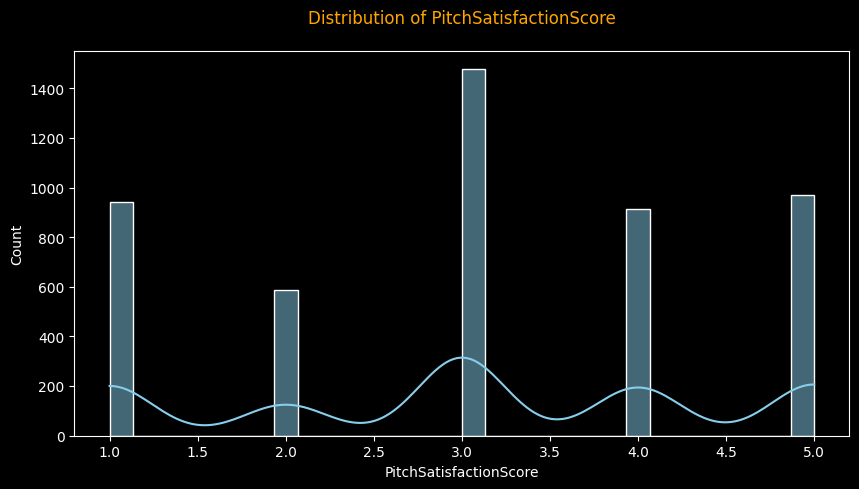

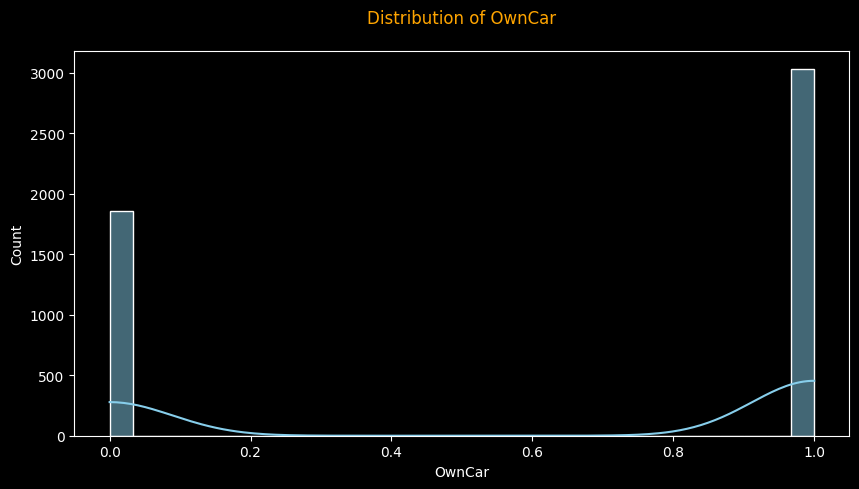

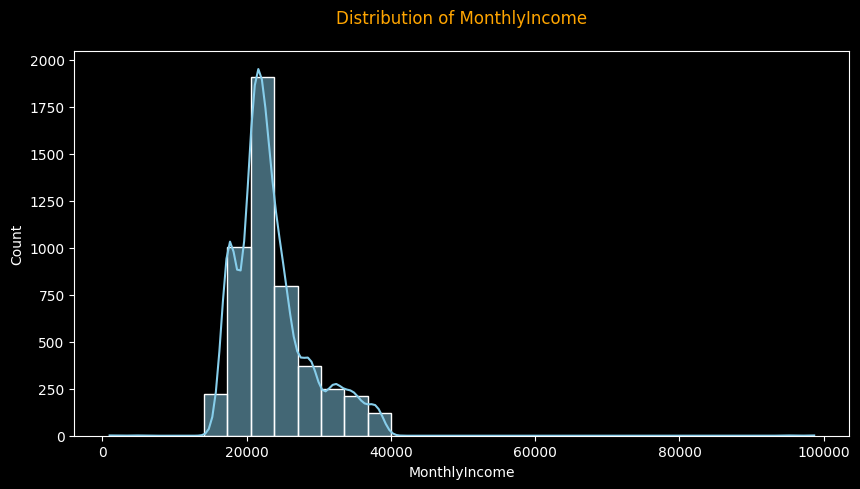

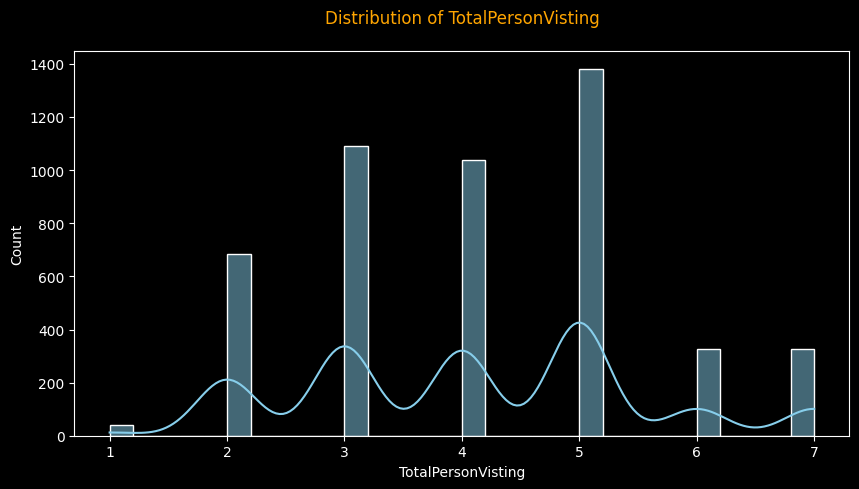

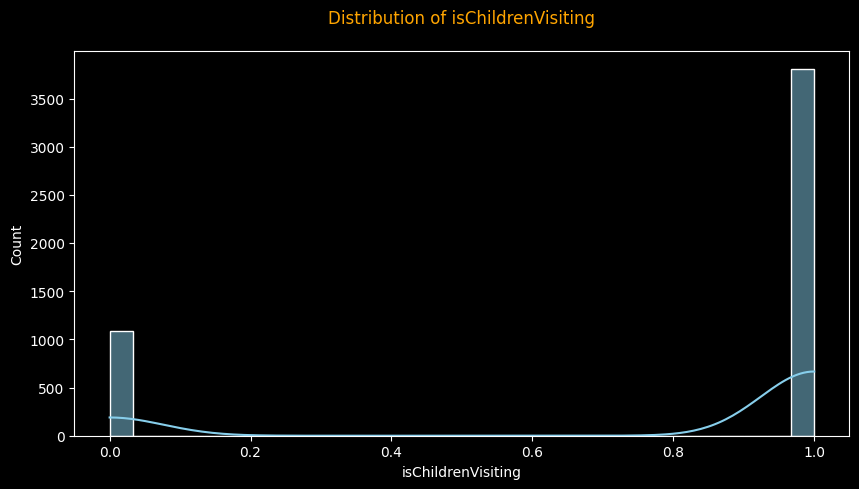

In [22]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='white')
    plt.title(f'Distribution of {col}', color='orange', y = 1.05)
    plt.show()


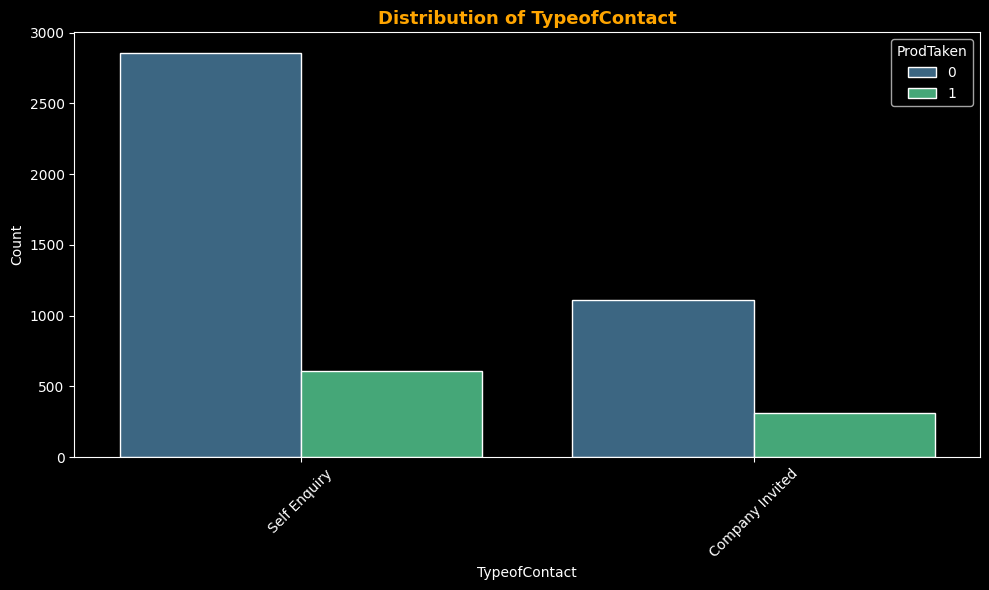

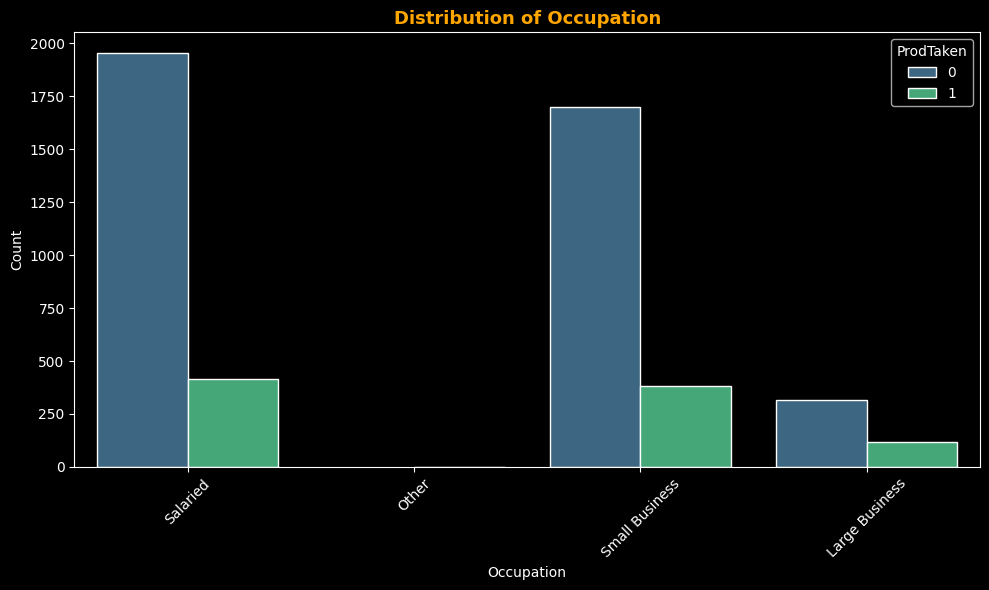

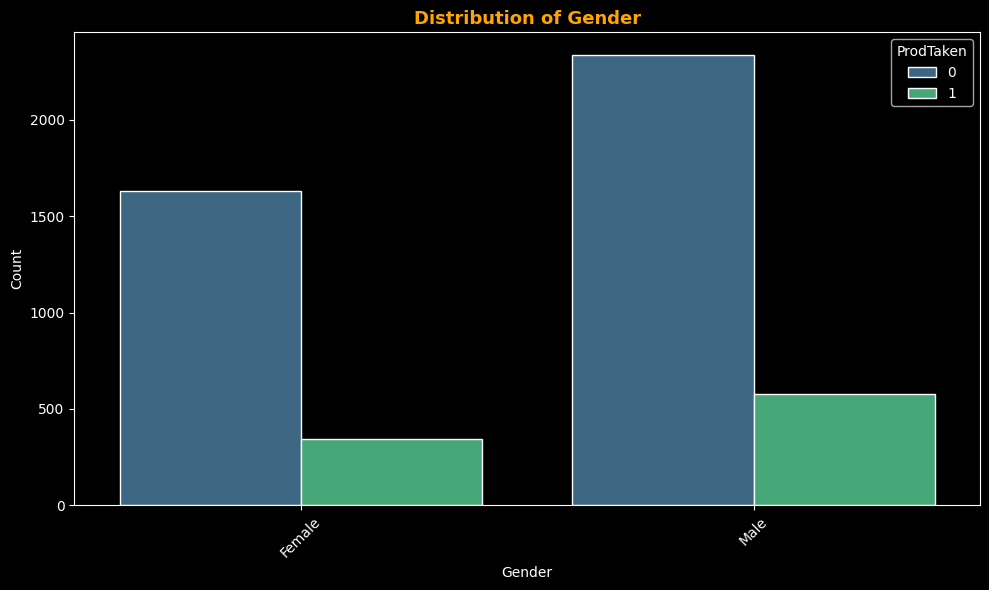

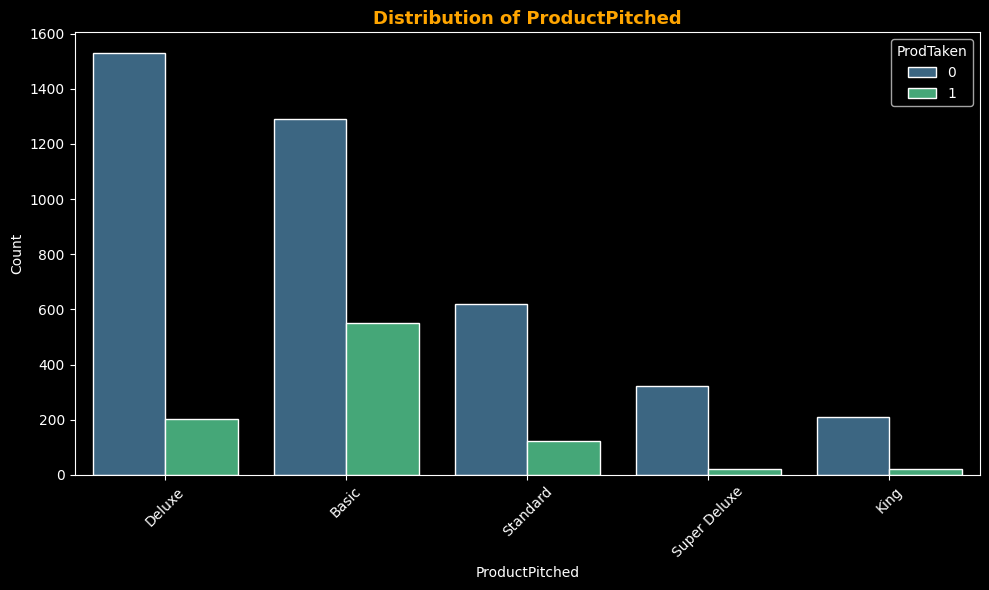

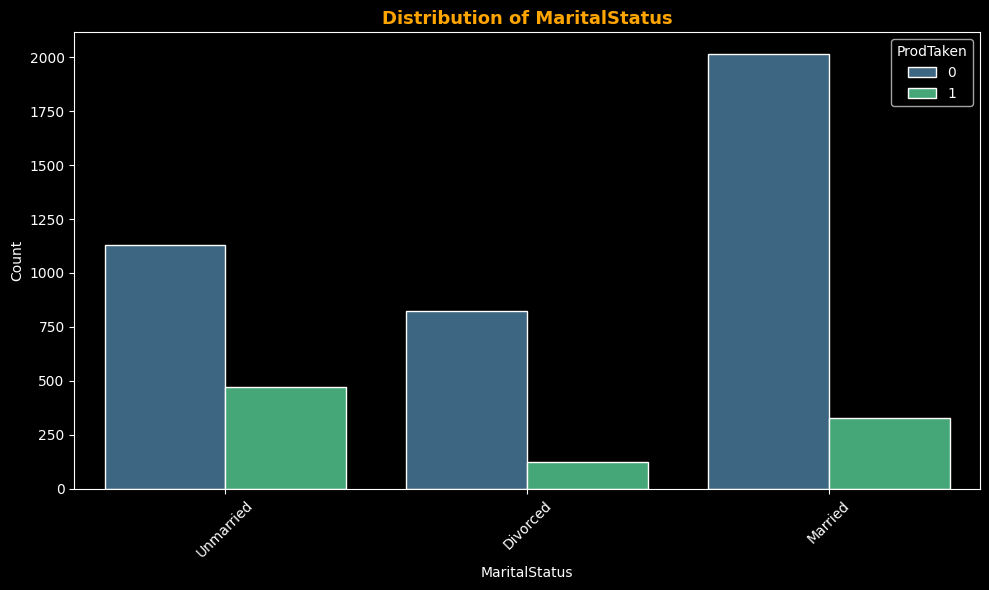

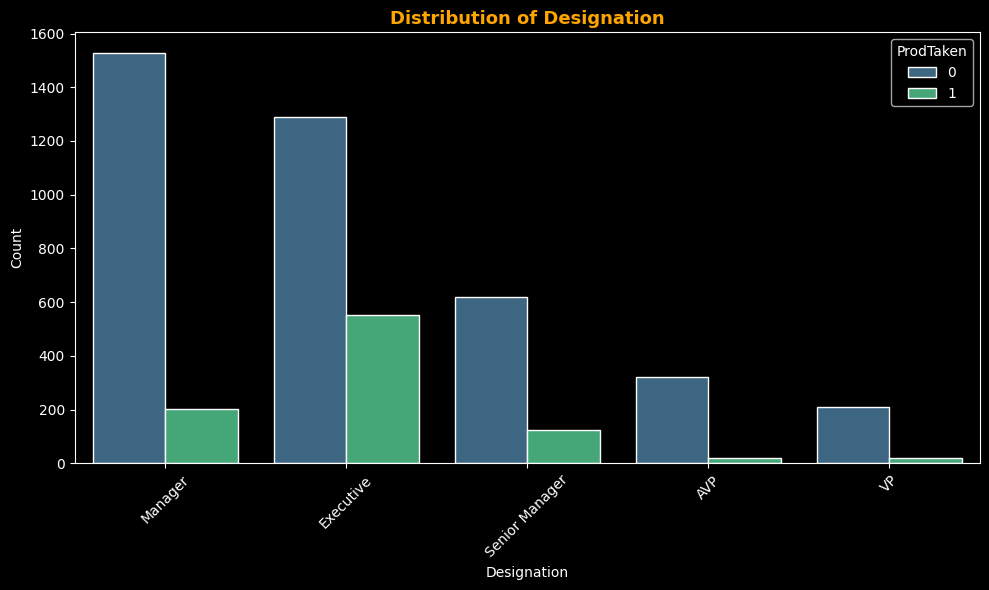

In [23]:
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col, palette='viridis', edgecolor='white', hue = "ProdTaken")
    plt.title(f'Distribution of {col}', fontsize=13, color='orange', fontweight='bold')
    plt.xlabel(col, color='white')
    plt.ylabel('Count', color='white')
    plt.xticks(color='white', rotation=45)
    plt.yticks(color='white')
    plt.tight_layout()
    plt.show()


In [120]:
# Show top segments by conversion and volume
slice_df = df.groupby(['CityTier','Occupation' , 'MaritalStatus' , 'Gender'])['ProdTaken'].agg(['count','mean']).reset_index()
slice_df = slice_df[slice_df['count']>50].sort_values('mean', ascending=False).head(20)
slice_df


,CityTier,Occupation,MaritalStatus,Gender,count,mean
5,1,Large Business,Unmarried,Male,66,0.606061
50,3,Small Business,Unmarried,Female,114,0.438596
44,3,Salaried,Unmarried,Female,92,0.391304
51,3,Small Business,Unmarried,Male,160,0.350000
45,3,Salaried,Unmarried,Male,126,0.301587
12,1,Salaried,Unmarried,Male,304,0.269737
26,2,Salaried,Married,Male,60,0.266667
18,1,Small Business,Unmarried,Male,210,0.257143
11,1,Salaried,Unmarried,Female,242,0.239669
2,1,Large Business,Married,Female,54,0.222222


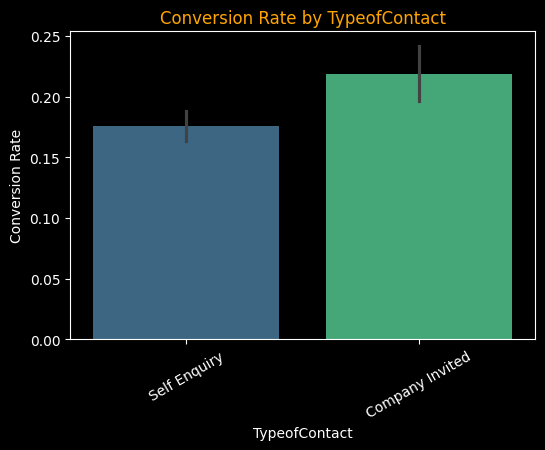

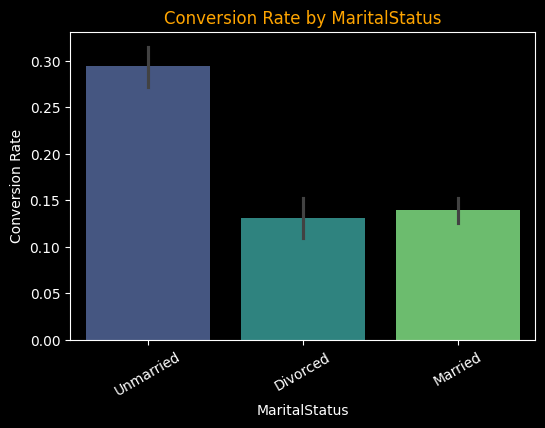

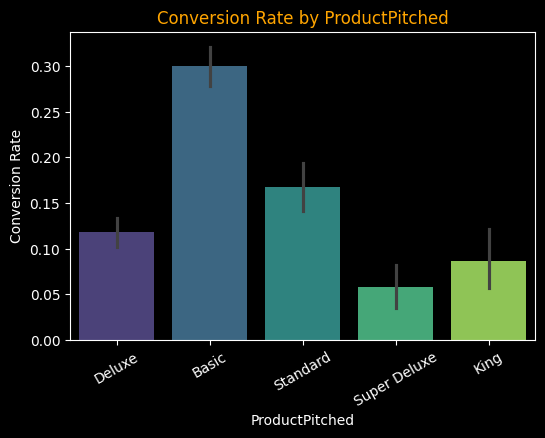

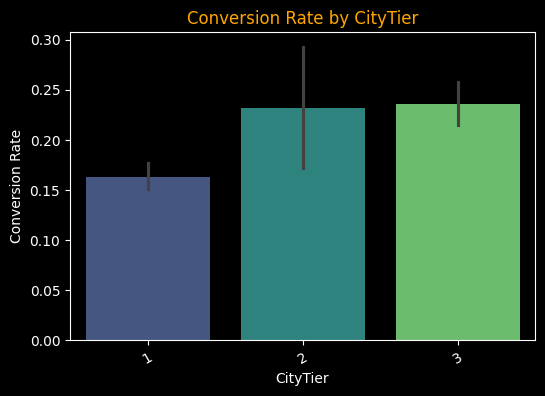

In [25]:
cols = ['TypeofContact' , 'MaritalStatus' , 'ProductPitched' , 'CityTier']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="ProdTaken", data=df, palette="viridis")
    plt.title(f"Conversion Rate by {col}", fontsize=12, color="orange")
    plt.xticks(rotation=30)
    plt.ylabel("Conversion Rate")
    plt.show()


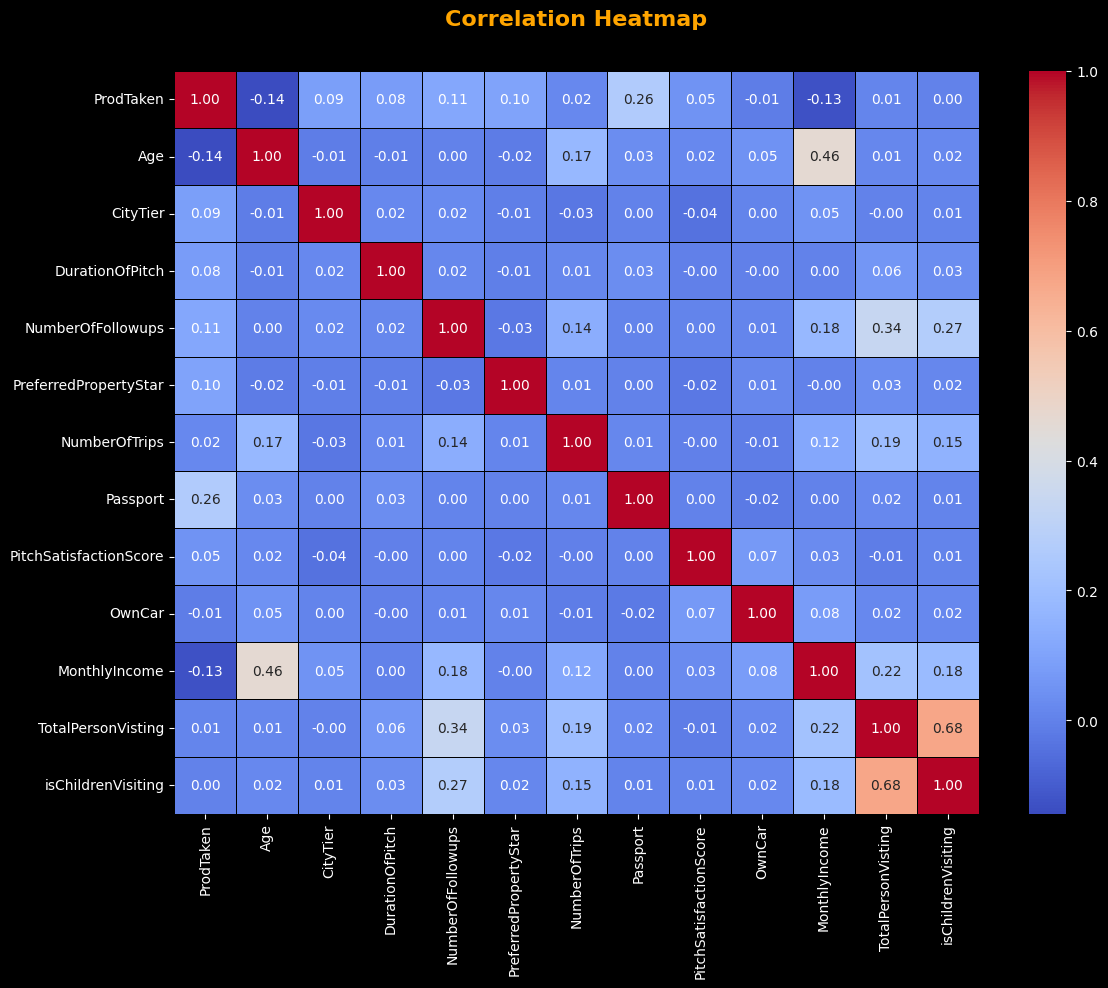

In [26]:
corr = df[num_cols].corr()    
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm' , linecolor = 'black' , linewidths = 0.5)
plt.title('Correlation Heatmap', fontsize=16, color='orange', fontweight='bold' , y = 1.05)
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalPersonVisting', 'isChildrenVisiting'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

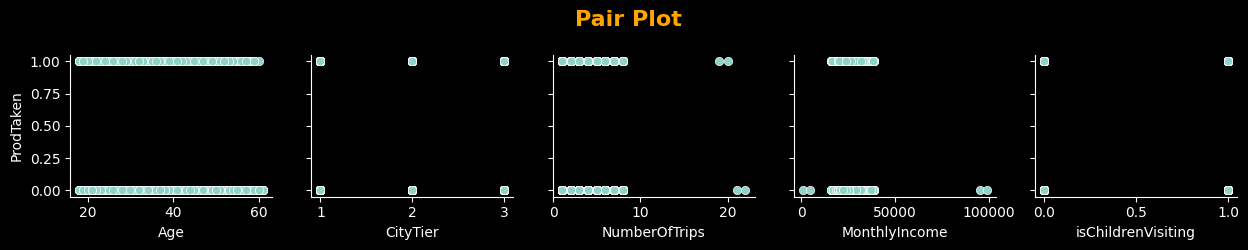

In [28]:
plt.figure(figsize=(10,8))
sns.pairplot(df, x_vars=['Age' , 'CityTier' , 'NumberOfTrips' , 'MonthlyIncome' , 'isChildrenVisiting'], y_vars='ProdTaken', kind='scatter')
plt.suptitle('Pair Plot', fontsize=16, color='orange', fontweight='bold')
plt.tight_layout()
plt.show()

<!-- ---- -->

<!-- ----- -->

<!-- ---- -->

## Model Training

In [117]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , roc_curve , roc_auc_score , auc , average_precision_score , precision_recall_curve

from sklearn.model_selection import RandomizedSearchCV

In [30]:
X = df.drop(['ProdTaken'] , axis = 1)
y = df['ProdTaken']

In [31]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisting,isChildrenVisiting
0,41,Self Enquiry,3,6,Salaried,Female,3,Deluxe,3,Unmarried,1,1,2,1,Manager,20993,3,0
1,49,Company Invited,1,14,Salaried,Male,4,Deluxe,4,Divorced,2,0,3,1,Manager,20130,5,1
2,37,Self Enquiry,1,8,Other,Male,4,Basic,3,Unmarried,7,1,3,0,Executive,17090,3,0
3,33,Company Invited,1,9,Salaried,Female,3,Basic,3,Divorced,2,1,5,1,Executive,17909,3,1
4,36,Self Enquiry,1,8,Small Business,Male,3,Basic,4,Divorced,1,0,5,1,Executive,18468,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49,Self Enquiry,3,9,Small Business,Male,5,Deluxe,4,Unmarried,2,1,1,1,Manager,26576,4,1
4884,28,Company Invited,1,31,Salaried,Male,5,Basic,3,Unmarried,3,1,3,1,Executive,21212,6,1
4885,52,Self Enquiry,3,17,Salaried,Female,4,Standard,4,Married,7,0,1,1,Senior Manager,31820,7,1
4886,19,Self Enquiry,3,16,Small Business,Male,4,Basic,3,Unmarried,3,0,5,0,Executive,20289,5,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3910, 18), (978, 18), (3910,), (978,))

In [33]:
# Define numerical and categorical columns
num_cols = X_train.select_dtypes(exclude = 'object').columns.tolist()

cat_cols = X_train.select_dtypes(include = 'object').columns.tolist()


# Defining column transformers
num_transformer = StandardScaler()

cat_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    transformers = [
        ('OneHotEncoder', cat_transformer, cat_cols) , 
        ('standardScaler' , num_transformer, num_cols)
    ], remainder='passthrough'
)

preprocessor

,transformers,"[('OneHotEncoder', ...), ('standardScaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


<!-- ----- -->

In [34]:
scale_pos = y_train.value_counts()[0] / y_train.value_counts()[1]

print(scale_pos)

4.363511659807956


In [ ]:
models = {

    'Logistic Regression': LogisticRegression(max_iter = 1000 , random_state = 42, class_weight = 'balanced'),
    'Support Vector Machine': SVC(random_state = 42 , class_weight = 'balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state = 42 , class_weight = 'balanced'),
    'Random Forest': RandomForestClassifier(random_state = 42 , class_weight = 'balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 42), 
    'AdaBoostClassifier': AdaBoostClassifier(random_state = 42),
    'XGBClassifier' : XGBClassifier(random_state = 42 ,  scale_pos_weight = scale_pos)

}

In [36]:
from sklearn.metrics import classification_report

In [37]:
results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    pipe.fit(X_train, y_train)

    y_pred_train = pipe.predict(X_train)

    y_pred = pipe.predict(X_test)

    print(f'Model : {name} trained successfully.' , '\n')
    # Train Metrics
    print("Performance on train set : \n")

    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)

    print(f"Accuracy: {train_acc}")
    print(f"F1 Score: {train_f1}")
    print(f"Precision: {train_precision}")
    print(f"Recall: {train_recall}\n")

    print("\n\n")

    # Test Metrics
    print("Performance on test set : \n")

    test_acc = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)


    
    print(f"Accuracy: {test_acc}")
    print(f"F1 Score: {test_f1}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}\n")
    print("\n" , "Classification Report : \n" , classification_report(y_test, y_pred))
    print("\n")
    print("--------"*50)
    print("\n")

    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Train F1': train_f1,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Test Accuracy': test_acc,
        'Test F1': test_f1,
        'Test Precision': test_precision,
        'Test Recall': test_recall
    })


Model : Logistic Regression trained successfully. 

Performance on train set : 

Accuracy: 0.7473145780051151
F1 Score: 0.5240847784200385
Precision: 0.4038604305864885
Recall: 0.7462277091906722




Performance on test set : 

Accuracy: 0.7341513292433538
F1 Score: 0.5220588235294118
Precision: 0.40226628895184136
Recall: 0.743455497382199


 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.73      0.82       787
           1       0.40      0.74      0.52       191

    accuracy                           0.73       978
   macro avg       0.66      0.74      0.67       978
weighted avg       0.82      0.73      0.76       978



-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Train F1,Train Precision,Train Recall,Test Accuracy,Test F1,Test Precision,Test Recall
0,Logistic Regression,0.747315,0.524085,0.403860,0.746228,0.734151,0.522059,0.402266,0.743455
1,Support Vector Machine,0.887980,0.750569,0.641675,0.903978,0.831288,0.640523,0.548507,0.769634
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.915133,0.762178,0.841772,0.696335
3,Random Forest,1.000000,1.000000,1.000000,1.000000,0.913088,0.723127,0.956897,0.581152
4,Gradient Boosting,0.893095,0.638408,0.864169,0.506173,0.862986,0.534722,0.793814,0.403141
5,AdaBoostClassifier,0.893095,0.638408,0.864169,0.506173,0.862986,0.534722,0.793814,0.403141
6,XGBClassifier,0.999488,0.998630,0.997264,1.000000,0.941718,0.843836,0.885057,0.806283


<!-- - -->

SELECTIMG AND TUNING THE BEST MODEL

In [ ]:
model_best = {
"XGBClassifier" : XGBClassifier(reg_alpha = 0.1, reg_lambda = 5, random_state = 42 , use_label_encoder = False , eval_metric = 'logloss' , scale_pos_weight = scale_pos)

}

for name , model in model_best.items() :
    pipe_best = Pipeline(steps = [
        ('preprocessor' , preprocessor) ,
        ('classifier' , model)
    ])

    pipe_best.fit(X_train , y_train)

    y_pred_best = pipe_best.predict(X_test)

    print(f'Model : {name} trained successfully.' , '\n')
    # Test Metrics
    print("Performance on test set : \n")
    test_acc = accuracy_score(y_test, y_pred_best)
    test_f1 = f1_score(y_test, y_pred_best)
    test_precision = precision_score(y_test, y_pred_best)
    test_recall = recall_score(y_test, y_pred_best)
    print(f"Accuracy: {test_acc}")
    print(f"F1 Score: {test_f1}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}\n")
    print("\n" , "Classification Report : \n" , classification_report(y_test, y_pred_best))
    print("\n")
    print("--------"*50)
    print("\n")

Model : XGBClassifier trained successfully. 

Performance on test set : 

Accuracy: 0.9519427402862985
F1 Score: 0.8719346049046321
Precision: 0.9090909090909091
Recall: 0.837696335078534


 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       787
           1       0.91      0.84      0.87       191

    accuracy                           0.95       978
   macro avg       0.94      0.91      0.92       978
weighted avg       0.95      0.95      0.95       978



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




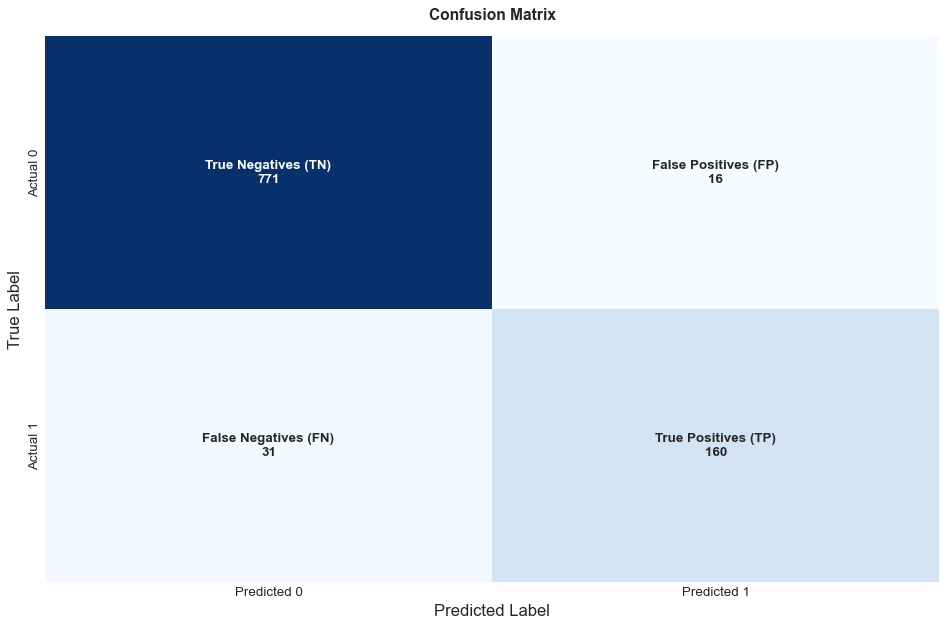

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Create labels for each cell (TP, FP, FN, TN)
group_names = ['True Negatives (TN)', 'False Positives (FP)',
               'False Negatives (FN)', 'True Positives (TP)']

# Flatten confusion matrix and pair with names
group_counts = [f"{value}" for value in cm.flatten()]
labels = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Plot heatmap
plt.figure(figsize=(12, 8), facecolor='white')
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            annot_kws={"size": 12, "weight": "bold"})

# Add titles and axis labels
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_best))

[[771  16]
 [ 31 160]]


<!-- ------ -->

ROC AUC CURVE

ROC-AUC Score: 0.9561393588216901


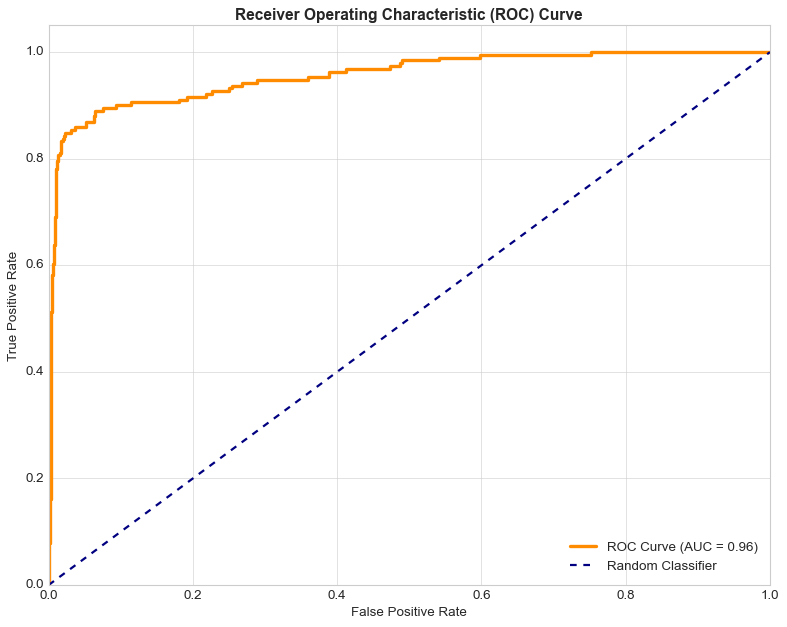


Detailed Metrics:
ROC-AUC Score: 0.9561
Area under ROC curve: 95.6%


In [96]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_pred_prob = pipe_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Print additional metrics
print(f"\nDetailed Metrics:")
print(f"ROC-AUC Score: {auc_score:.4f}")
print(f"Area under ROC curve: {auc_score:.1%}")


<!-- ---- -->

PRECISION - RECALL CURVE

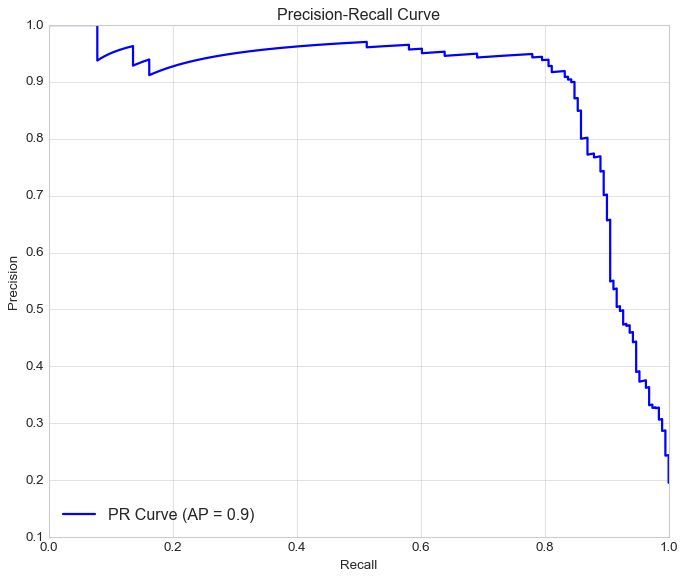

In [106]:
# 2️⃣ Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# 3️⃣ Compute the average precision score (area under PR curve)
avg_precision = average_precision_score(y_test, y_pred_prob)

# 4️⃣ Plot the Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AP = {avg_precision:.1f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()